In [171]:
%run C:\Users\Utente\Desktop\STAT_ML_proj\Functions.ipynb
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.io as sio
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation, FFMpegWriter
from itertools import product

In [136]:
def load_data_mat(path_single_file):
    file_to_open = path_single_file
    data = sio.loadmat(file_to_open)
    key_data = list(data.keys())[-1]
    data = data[key_data]
    return(data)

In [137]:
hyper = {
    "d": 3,
    "beta": 0.5,
    "gamma": 0.5,
    "inner_n": 200,
    "outer_n": 30,
    "lambda_reg" : 0.001
}

d = 3

noise = 1

In [138]:
corr_s = load_data_mat("SC_nof_100HCP.mat")
corr_t = load_data_mat("FC_mean_100HCP.mat")

In [139]:
corr_s

array([[0.00000000e+00, 6.32131702e+03, 6.61057121e+03, ...,
        6.52227996e+01, 4.28592920e+01, 5.15322756e+02],
       [6.32131702e+03, 0.00000000e+00, 3.58678287e+04, ...,
        7.43085408e+01, 1.41251580e+01, 6.58650530e+02],
       [6.61057121e+03, 3.58678287e+04, 0.00000000e+00, ...,
        4.34170613e+01, 4.74066374e+00, 1.91329685e+02],
       ...,
       [6.52227996e+01, 7.43085408e+01, 4.34170613e+01, ...,
        0.00000000e+00, 1.61536676e+05, 1.15848208e+05],
       [4.28592920e+01, 1.41251580e+01, 4.74066374e+00, ...,
        1.61536676e+05, 0.00000000e+00, 1.26690035e+05],
       [5.15322756e+02, 6.58650530e+02, 1.91329685e+02, ...,
        1.15848208e+05, 1.26690035e+05, 0.00000000e+00]])

In [140]:
corr_t

array([[ 1.        ,  0.02707908,  0.11908451, ...,  0.01867101,
        -0.04165368,  0.14802748],
       [ 0.02707908,  1.        ,  0.63406277, ..., -0.21947852,
        -0.28389722, -0.29396188],
       [ 0.11908451,  0.6340628 ,  1.        , ..., -0.24374153,
        -0.31390646, -0.28737277],
       ...,
       [ 0.01867101, -0.21947852, -0.24374157, ...,  1.        ,
         0.6813262 ,  0.35091656],
       [-0.04165368, -0.28389722, -0.31390646, ...,  0.6813262 ,
         1.        ,  0.36777756],
       [ 0.14802748, -0.29396188, -0.28737277, ...,  0.35091656,
         0.36777756,  1.        ]], dtype=float32)

In [141]:
# to build the frequency matrices, first of all I divide corr_s for its maximum value, to make it comparable with corr_t
# then I take the absolute value of corr-t, as it can have negative values, and I substract the identity matrix
m_s = (corr_s) / np.max(corr_s)
m_t = np.abs(corr_t) - np.eye(119)

In [142]:
# checking everything is correct
print(np.all(np.isnan(m_s)))
print(np.all(np.isnan(m_t)))

False
False


In [143]:
l_s = m_s.shape[0]
l_t = m_t.shape[0]
C_s = build_similitude_matrices(m_s)
C_t = build_similitude_matrices(m_t)
M_s = build_measure(m_s)
M_t = build_measure(m_t)

In [144]:
# 
emb_s = np.random.rand(d, l_s) * 5
emb_2 = emb_s + np.random.rand(d,l_s) * noise
emb_t = np.zeros((d,l_t))
for i in range(l_s):
    emb_t[:,i] = emb_2[:,i]

# this line is useless because they have the same dimension
#for i in range(l_s,l_t):
    #emb_t[:,i] = (np.random.rand(d, 1) * 5).reshape(-1)

In [145]:
embed_s, embed_t, T, correspondence, total_loss, embed_s_history, embed_t_history = GWL_simple_3(C_s, C_t, M_s, M_t,emb_s,emb_t, hyper)

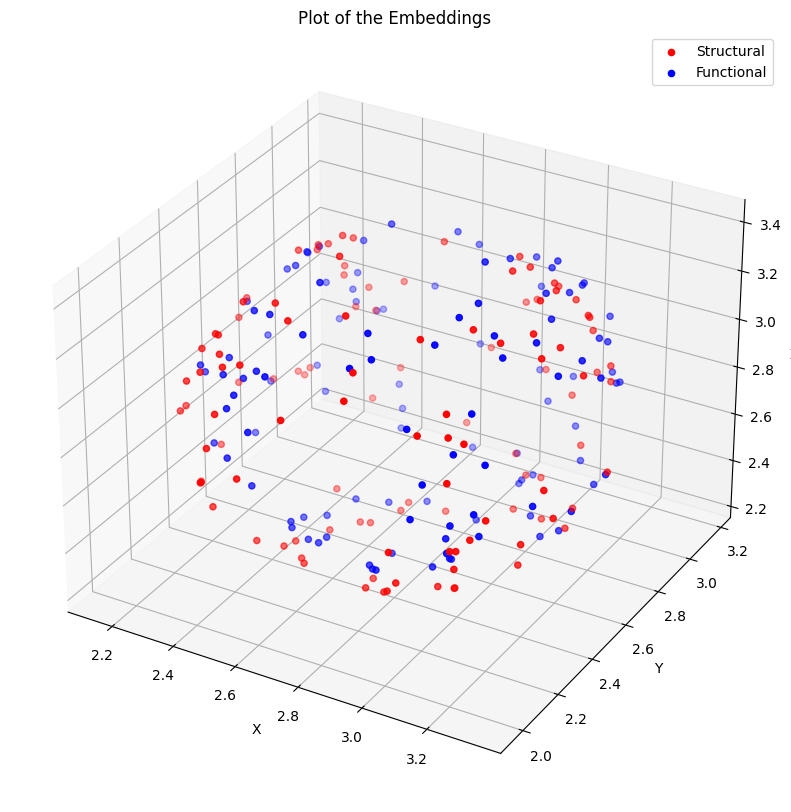

In [172]:
print_embeddings_one(embed_s, embed_t,name = "Plot_real_data_nof_without_lables", Labels=False, save = True)

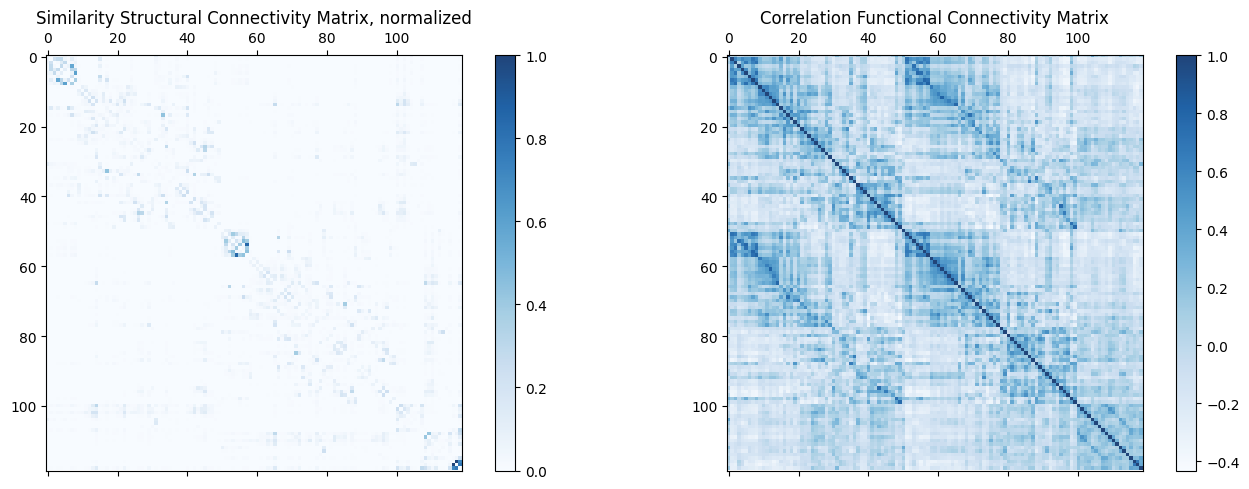

In [169]:
f,ax = plt.subplots(1,2, figsize = (14,5))
pos_0 =ax[0].matshow(m_s, alpha= 0.9, cmap="Blues")
pos_0
f.colorbar(pos_0,ax=ax[0])
ax[0].set_title("Similarity Structural Connectivity Matrix, normalized")
pos_1 = ax[1].matshow(corr_t, alpha=0.9, cmap="Blues")
pos_1
f.colorbar(pos_1,ax=ax[1])
ax[1].set_title("Correlation Functional Connectivity Matrix")
plt.savefig("Similarity_nof")
plt.tight_layout()